# Towards data exploration

In this notebook, we will focus on two essential skills in data analysis:

1. The ability to add select, aggregate and transform data in a dataframe (**part 1**)
2. The ability to get insights about a dataset by means of plotting and summary statistics (**part 2**)

## More pandas skills

In [18]:
import pandas as pd

### Load dataset

Let's read in a CSV file containing an export of [Elon Musk's tweets](https://twitter.com/elonmusk), exported from Twitter's API. 

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/mromanello/ADA-DHOxSS/master/data/musk_tweets/elonmusk_tweets.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


Let's give this dataset a bit more structure:
- the `id` column can be transformed into the dataframe's index, thus enabling us e.g. to select a tweet by id;
- `created_at` contains a timestamp, thus it can easily be converted into a `datetime` value
- but what's going on with the text column ??

In [21]:
df.set_index('id', drop=True, inplace=True)

In [22]:
df.created_at = pd.to_datetime(df.created_at)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 849636868052275200 to 15434727182
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2819 non-null   datetime64[ns]
 1   text        2819 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 66.1+ KB


### Selection

#### Renaming columns

An operation on dataframes that you'll find yourself doing very often is to rename the columns. 

The first way of renaming columns is by manipulating directly the dataframe's index via the `columns` property.

In [24]:
df.columns

Index(['created_at', 'text'], dtype='object')

We can change the column names by assigning to `columns` a list having as values the new column names.

**NB**: the size of the list and new number of colums must match!

In [25]:
# here we renamed the column `text` => `tweet`
df.columns = ['created_at', 'tweet']

In [26]:
# let's check that the change did take place
df.head()

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848943072423497728 2017-04-03 16:59:35   
848935705057280001 2017-04-03 16:30:19   
848416049573658624 2017-04-02 06:05:23   

                                                                tweet  
id                                                                     
849636868052275200  b'And so the robots spared humanity ... https:...  
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exa...  
848943072423497728      b'@waltmossberg @mims @defcon_5 Et tu, Walt?'  
848935705057280001                b'Stormy weather in Shortville ...'  
848416049573658624  b"@DaveLeeBBC @verge Coal is dying due to nat ...

The second way of renaming colums is to use the method `rename()` of a dataframe. The `columns` parameter takes a dictionary of mappings between old and new column names.

```python
mapping_dict = {
    "old_column_name": "new_column_name"
}
```

In [27]:
# let's change column `tweet` => `text`
df = df.rename(columns={"tweet": "text"})

In [28]:
df.head()

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848943072423497728 2017-04-03 16:59:35   
848935705057280001 2017-04-03 16:30:19   
848416049573658624 2017-04-02 06:05:23   

                                                                 text  
id                                                                     
849636868052275200  b'And so the robots spared humanity ... https:...  
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exa...  
848943072423497728      b'@waltmossberg @mims @defcon_5 Et tu, Walt?'  
848935705057280001                b'Stormy weather in Shortville ...'  
848416049573658624  b"@DaveLeeBBC @verge Coal is dying due to nat ...

**Question**: in which cases is it more convenient to use the second method over the first?

#### Selecting columns

In [29]:
# this selects one single column and returns as a Series
df["created_at"].head()

id
849636868052275200   2017-04-05 14:56:29
848988730585096192   2017-04-03 20:01:01
848943072423497728   2017-04-03 16:59:35
848935705057280001   2017-04-03 16:30:19
848416049573658624   2017-04-02 06:05:23
Name: created_at, dtype: datetime64[ns]

In [30]:
type(df["created_at"])

pandas.core.series.Series

In [31]:
# whereas this syntax selects one single column
# but returns a Dataframe
df[["created_at"]].head()

created_at
id                                    
849636868052275200 2017-04-05 14:56:29
848988730585096192 2017-04-03 20:01:01
848943072423497728 2017-04-03 16:59:35
848935705057280001 2017-04-03 16:30:19
848416049573658624 2017-04-02 06:05:23

In [32]:
type(df[["created_at"]])

pandas.core.frame.DataFrame

####  Selecting rows

Filtering rows in `pandas` is done by means of `[ ]`, which can contain the row number as well as a condition for the selection.

In [33]:
df[0:2]

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   

                                                                 text  
id                                                                     
849636868052275200  b'And so the robots spared humanity ... https:...  
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exa...

#### Other selections

Can be done using normal conditions (==, >, <, ..) and boolean operators.

### Transformation


The two main functions used to manipulate and transform values in a dataframe are:
- `map()`
- `apply()`

In this section we'll be using both to enrich our datasets with useful information (useful for exploration, for later visualizations, etc.).

#### Add link to original tweet

The `map()` method can be called on a column, as well as on the dataframe's index.

When passed as a parameter to `map`, the functional programming-stlye function `lambda` can be used to transform any value from that column into another one.   

In [38]:
df['tweet_link'] = df.index.map(lambda x: f'https://twitter.com/i/web/status/{x}')

In [39]:
pd.set_option("display.max_colwidth", 10000)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

df.head().style.format({'tweet_link': make_clickable})

# to apply the style to the entire dataframe just remove
# `.head` from the line above

#### Add colums with mentions

In [40]:
import re

def find_mentions(tweet_text):
    handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
    return re.findall(handle_regexp, tweet_text)

In [41]:
df['tweet_mentions'] = df.text.apply(find_mentions)

In [42]:
df['n_mentions'] = df.tweet_mentions.apply(len)

In [43]:
df.head()

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848943072423497728 2017-04-03 16:59:35   
848935705057280001 2017-04-03 16:30:19   
848416049573658624 2017-04-02 06:05:23   

                                                                                                                                                                          text  \
id                                                                                                                                                                               
849636868052275200                                                                                            b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
848943072423497728                                                                                                               b'@waltmossberg @mims @defcon_5 Et tu, Walt?'   
848935705057280001                                                                                                                         b'Stormy weather in Shortville ...'   
848416049573658624                                                                           b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."   

                                                             tweet_link  \
id                                                                        
849636868052275200  https://twitter.com/i/web/status/849636868052275200   
848988730585096192  https://twitter.com/i/web/status/848988730585096192   
848943072423497728  https://twitter.com/i/web/status/848943072423497728   
848935705057280001  https://twitter.com/i/web/status/848935705057280001   
848416049573658624  https://twitter.com/i/web/status/848416049573658624   

                                                   tweet_mentions  n_mentions  
id                                                                             
849636868052275200                                             []           0  
848988730585096192  [@ForIn2020, @waltmossberg, @mims, @defcon_5]           4  
848943072423497728              [@waltmossberg, @mims, @defcon_5]           3  
848935705057280001                                             []           0  
848416049573658624                          [@DaveLeeBBC, @verge]           2

#### Add column with week day

In [45]:
df.created_at.dt.day_name().head()

id
849636868052275200    Wednesday
848988730585096192       Monday
848943072423497728       Monday
848935705057280001       Monday
848416049573658624       Sunday
Name: created_at, dtype: object

In [46]:
df["week_day_name"] = df.created_at.dt.day_name()

In [48]:
df["week_day"] = df.created_at.dt.weekday

In [49]:
df.head(3)

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848943072423497728 2017-04-03 16:59:35   

                                                                                                                                                                          text  \
id                                                                                                                                                                               
849636868052275200                                                                                            b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
848943072423497728                                                                                                               b'@waltmossberg @mims @defcon_5 Et tu, Walt?'   

                                                             tweet_link  \
id                                                                        
849636868052275200  https://twitter.com/i/web/status/849636868052275200   
848988730585096192  https://twitter.com/i/web/status/848988730585096192   
848943072423497728  https://twitter.com/i/web/status/848943072423497728   

                                                   tweet_mentions  n_mentions  \
id                                                                              
849636868052275200                                             []           0   
848988730585096192  [@ForIn2020, @waltmossberg, @mims, @defcon_5]           4   
848943072423497728              [@waltmossberg, @mims, @defcon_5]           3   

                   week_day_name  week_day  
id                                          
849636868052275200     Wednesday         2  
848988730585096192        Monday         0  
848943072423497728        Monday         0

#### Add column with day hour

In [50]:
df.created_at.dt?

In [51]:
df.created_at.dt.hour.head()

id
849636868052275200    14
848988730585096192    20
848943072423497728    16
848935705057280001    16
848416049573658624     6
Name: created_at, dtype: int64

In [52]:
df["day_hour"] = df.created_at.dt.hour

In [53]:
display_cols = ['created_at', 'week_day', 'day_hour']
df[display_cols].head(4)

created_at  week_day  day_hour
id                                                        
849636868052275200 2017-04-05 14:56:29         2        14
848988730585096192 2017-04-03 20:01:01         0        20
848943072423497728 2017-04-03 16:59:35         0        16
848935705057280001 2017-04-03 16:30:19         0        16

#### Quiz

* Practice selection:
    - Select the tweets which have been posted on a given day of the week
    - Select those which have been posted at night
    - Select those posted during the weekend and lunch time
* Add a column `weekend` with a boolean value, at `True` if the day is during the weekend, and `False` otherwise

### Aggregation

(Figure taken from W. Mckinney's *Python for Data Analysis* 2013, p. 252)

<img src='images/groupby-mechanics.png' width='600px'>

In [54]:
df.agg({'n_mentions': ['min', 'max', 'sum']})

n_mentions
min           0
max           6
sum        2277

#### Grouping

In [55]:
df.groupby?

In [56]:
grp_by_day = df.groupby('week_day')

The object returned by `gropuby` is a `DataFrameGroupBy` **not** a normal `DataFrame`.

However, some methods of the latter work also on the former, e.g. `head` and `tail`

In [57]:
# the head of a DataFrameGroupBy consists of the first
# n records for each group (see `help(grp_by_day.head)`)

grp_by_day.head(1)

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848416049573658624 2017-04-02 06:05:23   
848244577521647616 2017-04-01 18:44:01   
847958571895619584 2017-03-31 23:47:32   
847594208219336705 2017-03-30 23:39:41   
846772378067648513 2017-03-28 17:14:01   

                                                                                                                                                                          text  \
id                                                                                                                                                                               
849636868052275200                                                                                            b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
848416049573658624                                                                           b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."   
848244577521647616             b"Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?"   
847958571895619584                                                  b'@BadAstronomer We can def bring it back like Dragon. Just a question of how much weight we need to add.'   
847594208219336705                                        b'Incredibly proud of the SpaceX team for achieving this milestone in space! Next goal is reflight within 24 hours.'   
846772378067648513                                                                             b'@danahull Very few. We have yet to do a China (or Europe) launch of Model 3.'   

                                                             tweet_link  \
id                                                                        
849636868052275200  https://twitter.com/i/web/status/849636868052275200   
848988730585096192  https://twitter.com/i/web/status/848988730585096192   
848416049573658624  https://twitter.com/i/web/status/848416049573658624   
848244577521647616  https://twitter.com/i/web/status/848244577521647616   
847958571895619584  https://twitter.com/i/web/status/847958571895619584   
847594208219336705  https://twitter.com/i/web/status/847594208219336705   
846772378067648513  https://twitter.com/i/web/status/846772378067648513   

                                                   tweet_mentions  n_mentions  \
id                                                                              
849636868052275200                                             []           0   
848988730585096192  [@ForIn2020, @waltmossberg, @mims, @defcon_5]           4   
848416049573658624                          [@DaveLeeBBC, @verge]           2   
848244577521647616                                             []           0   
847958571895619584                               [@BadAstronomer]           1   
847594208219336705                                             []           0   
846772378067648513                                    [@danahull]           1   

                   week_day_name  week_day  day_hour  
id                                                    
849636868052275200     Wednesday         2        14  
848988730585096192        Monday         0        20  
848416049573658624        Sunday         6         6  
848244577521647616      Saturday         5        18  
847958571895619584        Friday         4        23  
847594208219336705      Thursday         3        23  
846772378067648513       Tuesday         1        17

`agg` is used to pass an aggregation function to be applied to each group resulting from `groupby`.

In [58]:
# here we are interested in how many tweets
# there are for each group, so we pass `len()`

grp_by_day.agg(len)

created_at  text  tweet_link  tweet_mentions  n_mentions  \
week_day                                                             
0                315   315         315             315         315   
1                385   385         385             385         385   
2                380   380         380             380         380   
3                361   361         361             361         361   
4                530   530         530             530         530   
5                426   426         426             426         426   
6                422   422         422             422         422   

          week_day_name  day_hour  
week_day                           
0                   315       315  
1                   385       385  
2                   380       380  
3                   361       361  
4                   530       530  
5                   426       426  
6                   422       422

In [59]:
# however, we are not interested in having the count for all
# columns. rather we want to create a new dataframe with renamed
# column names

grp_by_day.agg({'text': len}).rename({'text': 'tweet_count'}, axis='columns')

tweet_count
week_day             
0                 315
1                 385
2                 380
3                 361
4                 530
5                 426
6                 422

##### By label (column)

Previously we've added a column indicating on which day of the week a given tweet appeared.

In [60]:
grpby_result_as_series = df.groupby('day_hour')['text'].count()

In [61]:
grpby_result_as_series.head()

day_hour
0    144
1    183
2    119
3    104
4     98
Name: text, dtype: int64

In [62]:
grpby_result_as_df = df.groupby('day_hour')[['text']]\
    .count()\
    .rename({'text': 'count'}, axis='columns')

In [63]:
grpby_result_as_df.head()

count
day_hour       
0           144
1           183
2           119
3           104
4            98

##### By series or dict

In [66]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day).agg({'text':len}).head()

text
created_at      
1            107
2            107
3            114
4             97
5            117

In [67]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day)[['text']].count().head()

text
created_at      
1            107
2            107
3            114
4             97
5            117

In [68]:
df.groupby(df.created_at.dt.hour)[['text']].count().head()

text
created_at      
0            144
1            183
2            119
3            104
4             98

##### By multiple labels (columns)

In [71]:
# here we group based on the values of two columns
# instead of one

x = df.groupby(['week_day_name', 'day_hour'])[['text']].count()

In [72]:
x.head()

text
week_day_name day_hour      
Friday        0           28
              1           29
              2           20
              3           20
              4           15

#### Aggregation methods

**Summary**:

- `count`: Number of non-NA values
- `sum`: Sum of non-NA values
- `mean`: Mean of non-NA values
- `median`: Arithmetic median of non-NA values
- `std`, `var`: standard deviation and variance
- `min`, `max`: Minimum and maximum of non-NA values

They can be used on a single series:

In [73]:
df.n_mentions.max()

6

On the entire dataframe:

In [75]:
df.mean()

<ipython-input-75-c61f0c8f89b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


n_mentions     0.807733
week_day       3.196169
day_hour      12.782547
dtype: float64

Or also as aggregation functions within a groupby:

In [76]:
df.groupby('week_day').agg(
    {
        # each key in this dict specifies
        # a given column
        'n_mentions':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)

n_mentions                                      
              count      mean min max       std       var
week_day                                                 
0               315  0.812698   0   5  0.964248  0.929775
1               385  0.729870   0   6  0.874861  0.765381
2               380  0.786842   0   4  0.768328  0.590328
3               361  0.781163   0   4  0.832853  0.693644
4               530  0.879245   0   5  0.901869  0.813368
5               426  0.727700   0   5  0.800607  0.640972
6               422  0.907583   0   6  0.851707  0.725406

#### Sorting

To sort the values of  a dataframe we use its `sort_values` method:
- `by`: specifies the name of the column to be used for sorting
- `ascending` (default = `True`): specifies whether the sorting should be *ascending* (A-Z, 0-9) or `descending` (Z-A, 9-0) 

In [77]:
df.sort_values(by='created_at', ascending=True).head()

created_at  \
id                                       
15434727182        2010-06-04 18:31:57   
142179928203460608 2011-12-01 09:55:11   
142188458125963264 2011-12-01 10:29:04   
142880871391838208 2011-12-03 08:20:28   
142881284019060736 2011-12-03 08:22:07   

                                                                                                                                                               text  \
id                                                                                                                                                                    
15434727182                                                         b'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'   
142179928203460608  b"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"   
142188458125963264                         b'I made the volume on the Model S http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'   
142880871391838208      b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'   
142881284019060736                                                                                                             b'That was a total non sequitur btw'   

                                                             tweet_link  \
id                                                                        
15434727182                https://twitter.com/i/web/status/15434727182   
142179928203460608  https://twitter.com/i/web/status/142179928203460608   
142188458125963264  https://twitter.com/i/web/status/142188458125963264   
142880871391838208  https://twitter.com/i/web/status/142880871391838208   
142881284019060736  https://twitter.com/i/web/status/142881284019060736   

                   tweet_mentions  n_mentions week_day_name  week_day  \
id                                                                      
15434727182                    []           0        Friday         4   
142179928203460608             []           0      Thursday         3   
142188458125963264             []           0      Thursday         3   
142880871391838208             []           0      Saturday         5   
142881284019060736             []           0      Saturday         5   

                    day_hour  
id                            
15434727182               18  
142179928203460608         9  
142188458125963264        10  
142880871391838208         8  
142881284019060736         8

In [78]:
df.sort_values(by='n_mentions', ascending=False).head()

created_at  \
id                                       
752721031735812096 2016-07-12 04:27:33   
303244501957365760 2013-02-17 20:48:17   
845289977051148289 2017-03-24 15:03:29   
672792504895434753 2015-12-04 15:00:07   
191005784862236672 2012-04-14 03:31:42   

                                                                                                                                                                          text  \
id                                                                                                                                                                               
752721031735812096                                               b"@kumailn @RealDaveBarton @JuddApatow @SiliconHBO @FredericLambert @MikeJudge can't wait to see the costume"   
303244501957365760            b'RT @LawrenceChanin: @TeslaRoadTrip @avantgame @TEDchris @elonmusk @nytimes   \nThe driving public is the winner thanks to the efforts of  ...'   
845289977051148289                                             b'@faultywarrior @matt_trulli @FredericLambert @TimShelton @JimPengelly Let me just go fetch my magic wand ...'   
672792504895434753  b"RT @WSJLife: Supermodel @KarlieKloss blasts off to the future at @elonmusk's @spacex HQ https://t.co/PfE2bWcQwM @wsjmag https://t.co/zc7QM9\xe2\x80\xa6"   
191005784862236672  b'RT @SethGreen: My love @ClareGrant & @elonmusk partied with the space cheese on our tour of @SpaceX & @TeslaMotors ...which was AWESO\xe2\x80\xa6 h ...'   

                                                             tweet_link  \
id                                                                        
752721031735812096  https://twitter.com/i/web/status/752721031735812096   
303244501957365760  https://twitter.com/i/web/status/303244501957365760   
845289977051148289  https://twitter.com/i/web/status/845289977051148289   
672792504895434753  https://twitter.com/i/web/status/672792504895434753   
191005784862236672  https://twitter.com/i/web/status/191005784862236672   

                                                                                         tweet_mentions  \
id                                                                                                        
752721031735812096  [@kumailn, @RealDaveBarton, @JuddApatow, @SiliconHBO, @FredericLambert, @MikeJudge]   
303244501957365760        [@LawrenceChanin, @TeslaRoadTrip, @avantgame, @TEDchris, @elonmusk, @nytimes]   
845289977051148289          [@faultywarrior, @matt_trulli, @FredericLambert, @TimShelton, @JimPengelly]   
672792504895434753                                [@WSJLife, @KarlieKloss, @elonmusk, @spacex, @wsjmag]   
191005784862236672                          [@SethGreen, @ClareGrant, @elonmusk, @SpaceX, @TeslaMotors]   

                    n_mentions week_day_name  week_day  day_hour  
id                                                                
752721031735812096           6       Tuesday         1         4  
303244501957365760           6        Sunday         6        20  
845289977051148289           5        Friday         4        15  
672792504895434753           5        Friday         4        15  
191005784862236672           5      Saturday         5         3

## A first exploration

### `describe()`

In [114]:
# the default behavior is to include only
# columns with numerical values

df.describe()

n_mentions     week_day     day_hour         year
count  2819.000000  2819.000000  2819.000000  2819.000000
mean      0.807733     3.196169    12.782547  2014.777226
std       0.859091     1.946637     7.611198     1.687017
min       0.000000     0.000000     0.000000  2010.000000
25%       0.000000     2.000000     5.000000  2013.000000
50%       1.000000     3.000000    15.000000  2015.000000
75%       1.000000     5.000000    19.000000  2016.000000
max       6.000000     6.000000    23.000000  2017.000000

In [115]:
# in this case fails as pandas does not 
# now how to handle a column with values of type list (fair enough)

df.describe(include='all', datetime_is_numeric=True)

created_at  \
count                            2819   
unique                            NaN   
top                               NaN   
freq                              NaN   
mean    2015-03-24 20:24:24.578928896   
min               2010-06-04 18:31:57   
25%               2013-06-28 18:27:19   
50%               2015-10-21 23:14:33   
75%               2016-08-30 04:08:30   
max               2017-04-05 14:56:29   
std                               NaN   

                                                                                                                      text  \
count                                                                                                                 2819   
unique                                                                                                                2819   
top     b'Scientists: Earth Endangered by New Strain of Fact-Resistant Humans https://t.co/ihmrY43rHa via @BorowitzReport'   
freq                                                                                                                     1   
mean                                                                                                                   NaN   
min                                                                                                                    NaN   
25%                                                                                                                    NaN   
50%                                                                                                                    NaN   
75%                                                                                                                    NaN   
max                                                                                                                    NaN   
std                                                                                                                    NaN   

                                                 tweet_link tweet_mentions  \
count                                                  2819           2819   
unique                                                 2819           1181   
top     https://twitter.com/i/web/status/318122230758391808             []   
freq                                                      1           1145   
mean                                                    NaN            NaN   
min                                                     NaN            NaN   
25%                                                     NaN            NaN   
50%                                                     NaN            NaN   
75%                                                     NaN            NaN   
max                                                     NaN            NaN   
std                                                     NaN            NaN   

         n_mentions week_day_name     week_day     day_hour         year  
count   2819.000000          2819  2819.000000  2819.000000  2819.000000  
unique          NaN             7          NaN          NaN          NaN  
top             NaN        Friday          NaN          NaN          NaN  
freq            NaN           530          NaN          NaN          NaN  
mean       0.807733           NaN     3.196169    12.782547  2014.777226  
min        0.000000           NaN     0.000000     0.000000  2010.000000  
25%        0.000000           NaN     2.000000     5.000000  2013.000000  
50%        1.000000           NaN     3.000000    15.000000  2015.000000  
75%        1.000000           NaN     5.000000    19.000000  2016.000000  
max        6.000000           NaN     6.000000    23.000000  2017.000000  
std        0.859091           NaN     1.946637     7.611198     1.687017

In [116]:
# that's a workaround to include all other columns

df.describe(exclude=[list], datetime_is_numeric=True)

created_at   n_mentions week_day_name     week_day  \
count                            2819  2819.000000          2819  2819.000000   
unique                            NaN          NaN             7          NaN   
top                               NaN          NaN        Friday          NaN   
freq                              NaN          NaN           530          NaN   
mean    2015-03-24 20:24:24.578928896     0.807733           NaN     3.196169   
min               2010-06-04 18:31:57     0.000000           NaN     0.000000   
25%               2013-06-28 18:27:19     0.000000           NaN     2.000000   
50%               2015-10-21 23:14:33     1.000000           NaN     3.000000   
75%               2016-08-30 04:08:30     1.000000           NaN     5.000000   
max               2017-04-05 14:56:29     6.000000           NaN     6.000000   
std                               NaN     0.859091           NaN     1.946637   

           day_hour         year  
count   2819.000000  2819.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      12.782547  2014.777226  
min        0.000000  2010.000000  
25%        5.000000  2013.000000  
50%       15.000000  2015.000000  
75%       19.000000  2016.000000  
max       23.000000  2017.000000  
std        7.611198     1.687017

In [117]:
df.created_at.describe(datetime_is_numeric=True)

count                             2819
mean     2015-03-24 20:24:24.578928896
min                2010-06-04 18:31:57
25%                2013-06-28 18:27:19
50%                2015-10-21 23:14:33
75%                2016-08-30 04:08:30
max                2017-04-05 14:56:29
Name: created_at, dtype: object

In [118]:
df['week_day_name'] = df['week_day_name'].astype('category')

In [119]:
df.describe(exclude=['object'], datetime_is_numeric=True)

created_at   n_mentions week_day_name     week_day  \
count                            2819  2819.000000          2819  2819.000000   
unique                            NaN          NaN             7          NaN   
top                               NaN          NaN        Friday          NaN   
freq                              NaN          NaN           530          NaN   
mean    2015-03-24 20:24:24.578928896     0.807733           NaN     3.196169   
min               2010-06-04 18:31:57     0.000000           NaN     0.000000   
25%               2013-06-28 18:27:19     0.000000           NaN     2.000000   
50%               2015-10-21 23:14:33     1.000000           NaN     3.000000   
75%               2016-08-30 04:08:30     1.000000           NaN     5.000000   
max               2017-04-05 14:56:29     6.000000           NaN     6.000000   
std                               NaN     0.859091           NaN     1.946637   

           day_hour         year  
count   2819.000000  2819.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean      12.782547  2014.777226  
min        0.000000  2010.000000  
25%        5.000000  2013.000000  
50%       15.000000  2015.000000  
75%       19.000000  2016.000000  
max       23.000000  2017.000000  
std        7.611198     1.687017

### Plotting

In [120]:
%matplotlib inline

import matplotlib.pyplot as plt

#### Histograms

They are useful to see the distribution of a certain variable in your dataset.

In [90]:
df.groupby(['n_mentions'])[['text']].count()

text
n_mentions      
0           1145
1           1231
2            329
3             78
4             28
5              6
6              2

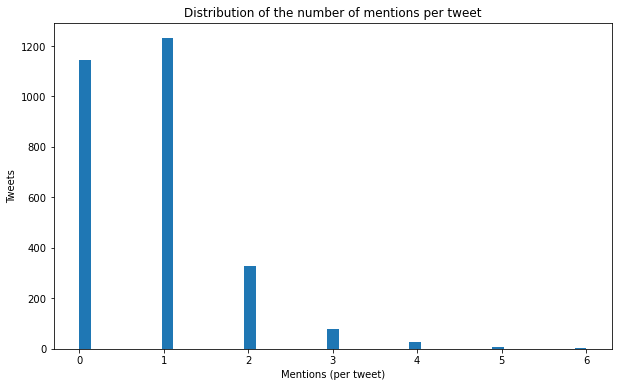

In [91]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df.n_mentions, bins='auto', rwidth=1.0)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Mentions (per tweet)")
plt.show()

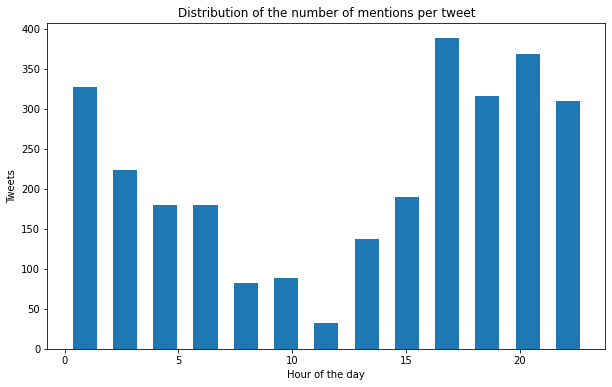

In [92]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df.day_hour, bins='auto', rwidth=0.6)
plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

In [93]:
df_2017 = df[df.created_at.dt.year == 2017]

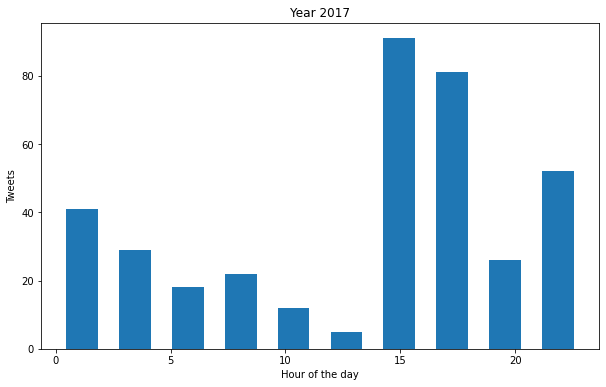

In [94]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df_2017.day_hour, bins='auto', rwidth=0.6)
plt.title('Year 2017')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

So far we have used directly `matplotlib` to generate our plots.

`pandas`'s dataframes provide some methods that directly call `matplotlib`'s API behind the scenes:
- `hist()` for histograms
- `boxplot()` for boxplots
- `plot()` for other types of plots (specified with e.g. `any='scatter'`)

By passing the `by` parameter to e.g. `hist()` it is possible to produce one histogram plot of a given variable for each value in another column.

Let's see how we can plot the number of mentions by year:

In [95]:
df['year'] = df.created_at.dt.year

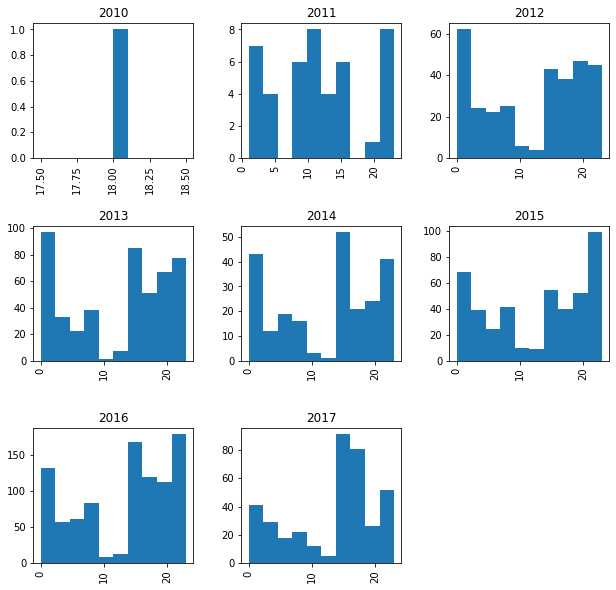

In [96]:
axes = df.hist(column='day_hour', by='year', figsize=(10,10))

#### Scatter plots

They are useful to plot the relation between two variables in your dataset.

In [97]:
df.head(3)

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848943072423497728 2017-04-03 16:59:35   

                                                                                                                                                                          text  \
id                                                                                                                                                                               
849636868052275200                                                                                            b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
848943072423497728                                                                                                               b'@waltmossberg @mims @defcon_5 Et tu, Walt?'   

                                                             tweet_link  \
id                                                                        
849636868052275200  https://twitter.com/i/web/status/849636868052275200   
848988730585096192  https://twitter.com/i/web/status/848988730585096192   
848943072423497728  https://twitter.com/i/web/status/848943072423497728   

                                                   tweet_mentions  n_mentions  \
id                                                                              
849636868052275200                                             []           0   
848988730585096192  [@ForIn2020, @waltmossberg, @mims, @defcon_5]           4   
848943072423497728              [@waltmossberg, @mims, @defcon_5]           3   

                   week_day_name  week_day  day_hour  year  
id                                                          
849636868052275200     Wednesday         2        14  2017  
848988730585096192        Monday         0        20  2017  
848943072423497728        Monday         0        16  2017

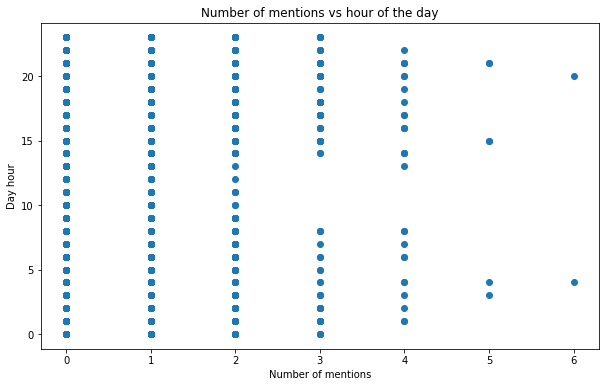

In [98]:
%matplotlib inline
plt.figure(figsize=(10, 6))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df.n_mentions, df.day_hour)

# give a title to the plot
plt.title('Number of mentions vs hour of the day')

# give a label to the axes
plt.ylabel("Day hour")
plt.xlabel("Number of mentions")
plt.show()

#### Bar charts

They are useful to plot categorical data.

In [100]:
tweets_by_weekday = df.groupby(df.created_at.dt.weekday)[['text']].count()

In [101]:
week_days = [
    "Mon",
    "Tue",
    "Wed",
    "Thur",
    "Fri",
    "Sat",
    "Sun"
]

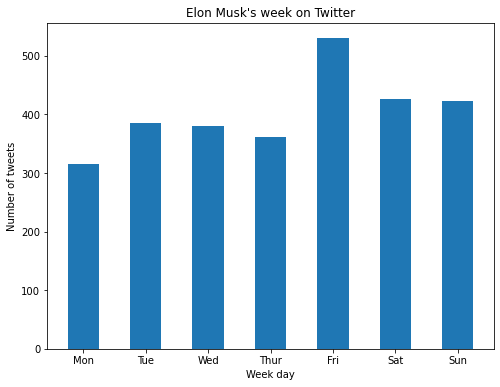

In [102]:
%matplotlib inline
plt.figure(figsize=(8, 6))

# specify the type of plot and the labels
# for the y axis (the bars)
plt.bar(
    tweets_by_weekday.index,
    tweets_by_weekday.text,
    tick_label=week_days,
    width=0.5
)

# give a title to the plot
plt.title('Elon Musk\'s week on Twitter')

# give a label to the axes
plt.ylabel("Number of tweets")
plt.xlabel("Week day")
plt.show()

#### Box plots

![box plot explained](./images/eda-boxplot.png)

In [104]:
tweets_by_weekday

text
created_at      
0            315
1            385
2            380
3            361
4            530
5            426
6            422

In [105]:
tweets_by_weekday.describe()

text
count    7.000000
mean   402.714286
std     67.551744
min    315.000000
25%    370.500000
50%    385.000000
75%    424.000000
max    530.000000

<AxesSubplot:>

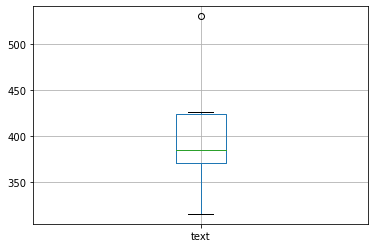

In [106]:
tweets_by_weekday.boxplot()

In [108]:
df.head(3)

created_at  \
id                                       
849636868052275200 2017-04-05 14:56:29   
848988730585096192 2017-04-03 20:01:01   
848943072423497728 2017-04-03 16:59:35   

                                                                                                                                                                          text  \
id                                                                                                                                                                               
849636868052275200                                                                                            b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
848988730585096192  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
848943072423497728                                                                                                               b'@waltmossberg @mims @defcon_5 Et tu, Walt?'   

                                                             tweet_link  \
id                                                                        
849636868052275200  https://twitter.com/i/web/status/849636868052275200   
848988730585096192  https://twitter.com/i/web/status/848988730585096192   
848943072423497728  https://twitter.com/i/web/status/848943072423497728   

                                                   tweet_mentions  n_mentions  \
id                                                                              
849636868052275200                                             []           0   
848988730585096192  [@ForIn2020, @waltmossberg, @mims, @defcon_5]           4   
848943072423497728              [@waltmossberg, @mims, @defcon_5]           3   

                   week_day_name  week_day  day_hour  year  
id                                                          
849636868052275200     Wednesday         2        14  2017  
848988730585096192        Monday         0        20  2017  
848943072423497728        Monday         0        16  2017

In [109]:
df[['day_hour']].describe()

day_hour
count  2819.000000
mean     12.782547
std       7.611198
min       0.000000
25%       5.000000
50%      15.000000
75%      19.000000
max      23.000000

In [110]:
df[['day_hour']].quantile(.25)

day_hour    5.0
Name: 0.25, dtype: float64

In [111]:
df.boxplot?

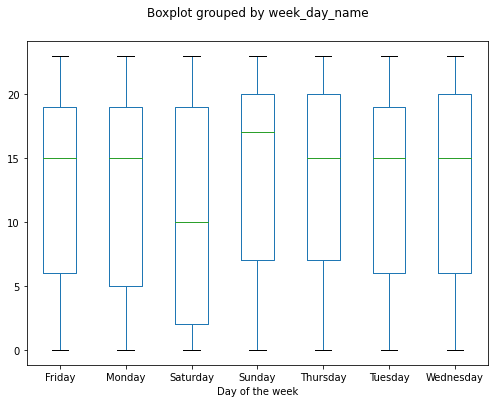

In [112]:
%matplotlib inline

df[['day_hour', 'week_day_name']].boxplot(
    by='week_day_name',
    grid=False,
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

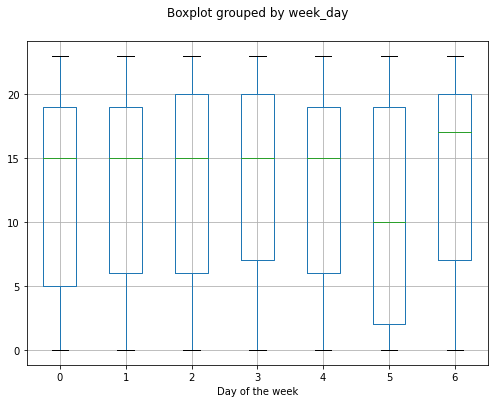

In [113]:
%matplotlib inline

df[['day_hour', 'week_day']].boxplot(
    by='week_day',
    grid=True, # just to show the difference with/without
    figsize=(8,6),
    fontsize=10
)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Day of the week")
plt.show()

#### Quiz

* Plot (in any way you deem appropriate) the length of tweets per day of the week
* The same, but per hour
* The same, but weekend or not
* Briefly comment upon your results

---